In [33]:
#Introduction to MLF

from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [34]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(X)

(120, 4)
(30, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

In [35]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

In [36]:

mask =  y < 2

X_bin = X[mask]
y_bin = y[mask]

X_bin = X_bin[:, :2]


print(f" Old format : {X.shape} / New format : {X_bin.shape}")
print(f" Old format : {y.shape} / New format : {y_bin.shape}")

 Old format : (150, 4) / New format : (100, 2)
 Old format : (150,) / New format : (100,)


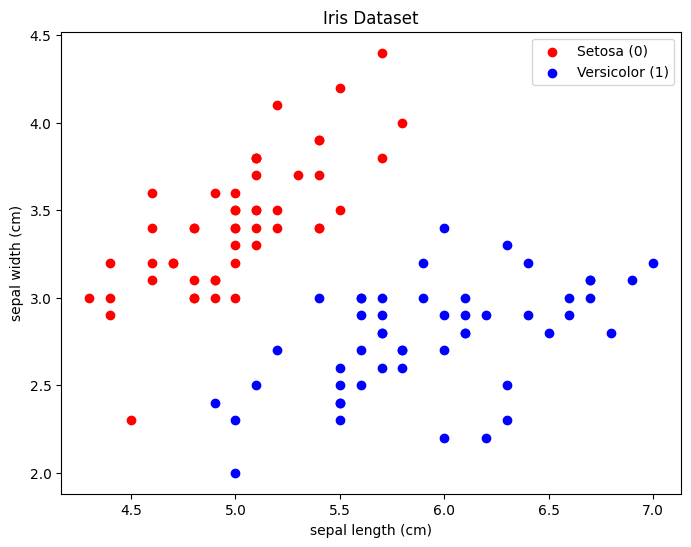

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.scatter(X_bin[y_bin == 0, 0],X_bin[y_bin == 0, 1],color='red', label='Setosa (0)')

plt.scatter(X_bin[y_bin == 1, 0],X_bin[y_bin == 1, 1],color='blue', label='Versicolor (1)')

plt.title("Iris Dataset")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin,test_size=0.2)

c = 200

print(f"\n--- Test with C = {c} ---")
model_v1 = SVC(kernel='linear', C=c)
model_v1.fit(X_train, y_train)
score_v1 = model_v1.score(X_test, y_test)
print(f"Accuracy (C={c}): {score_v1}")
print(f"Support vectores: {len(model_v1.support_vectors_)}")



--- Test with C = 200 ---
Accuracy (C=200): 1.0
Support vectores: 3


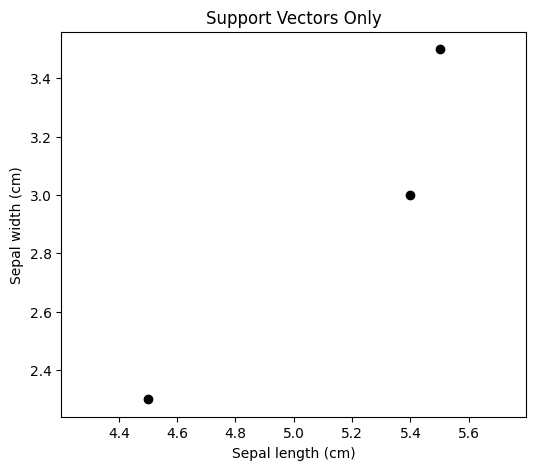

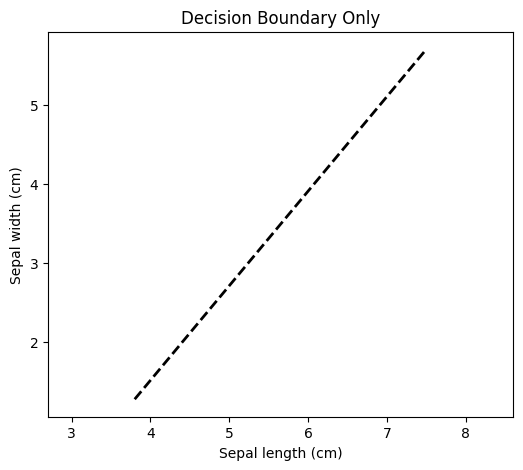

In [59]:
import numpy as np

# Support vectors
supvectors = model_v1.support_vectors_

# coef
W = model_v1.coef_[0]
b = model_v1.intercept_[0]

# values to get the line
x_vals = np.linspace(X_bin[:,0].min() - 0.5, X_bin[:,0].max() + 0.5, 100)
y_vals = -(W[0]*x_vals + b)/W[1]

# support vectors
plt.figure(figsize=(6,5))
plt.scatter(supvectors[:,0], supvectors[:,1], color = "black")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Support Vectors Only')
plt.axis('equal')
plt.show()

# decison line
plt.figure(figsize=(6,5))
plt.plot(x_vals, y_vals, 'k--', linewidth=2)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundary Only')
plt.axis('equal')
plt.show()


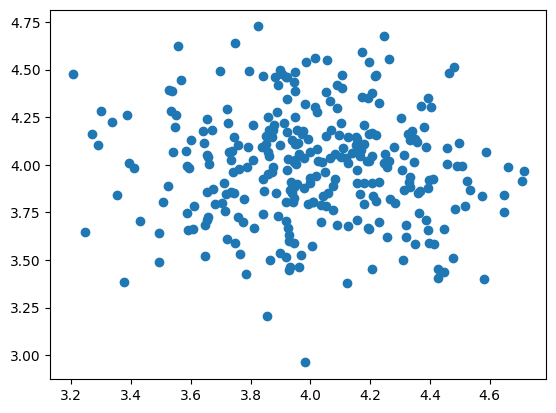

In [40]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

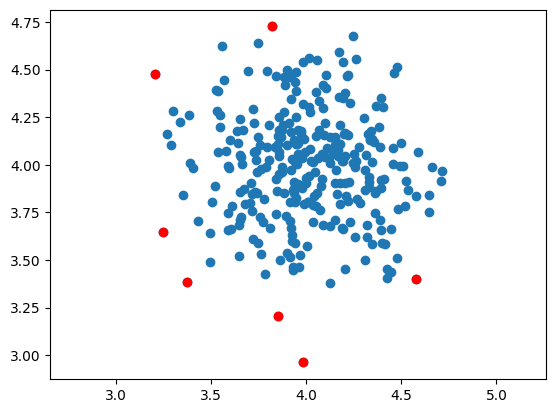

In [41]:

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()


[[3.85463046 3.20400443]
 [4.24554653 4.67363469]
 [3.20576064 4.47847741]
 [4.47941497 4.51111655]
 [3.82382713 4.72625839]
 [3.3759303  3.38448149]
 [3.98286354 2.96191517]
 [3.55773919 4.62591332]
 [4.71389792 3.96511489]
 [4.57987163 3.40192854]]


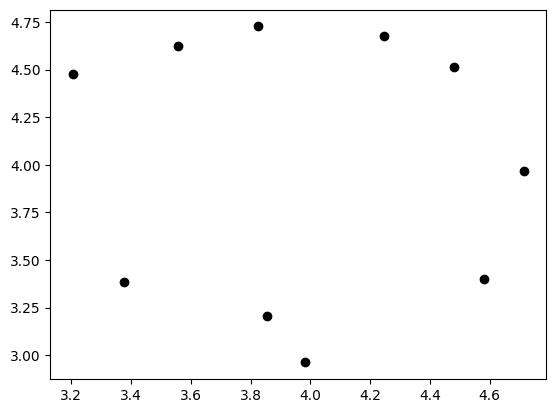

In [42]:
support_vectors = SVMmodelOne.support_vectors_
print(support_vectors)

plt.scatter(support_vectors[:,0], support_vectors[:,1], color='black')
plt.show()